# Содержание #

* 1 Изучение общей информации
* 2 Подготовка и предобработка данных
    * Выводы по предобработке данных
* 3 Исследовательский анализ данных
    * Построение графика "Ящик с усами"
* 4 Составление портрета пользователя каждого региона
    * Северная Америка
    * Европа
    * Япония
* 5 Проверка гипотез


<div style="border:2px solid Black; padding:20px;">
<h1>Сборный проект</h1>



- Описание проекта:

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные о поведении пользователей вы получите из файла /datasets/games.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.

Цель исследования — проверька гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Таким образом, исследование пройдёт в три этапа:

Обзор данных.
Предобработка данных.
Проверка гипотез.

</div>

## Шаг 1. Изучение общей информации

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [ ]:
data = pd.read_csv('datasets/games.csv')

In [ ]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


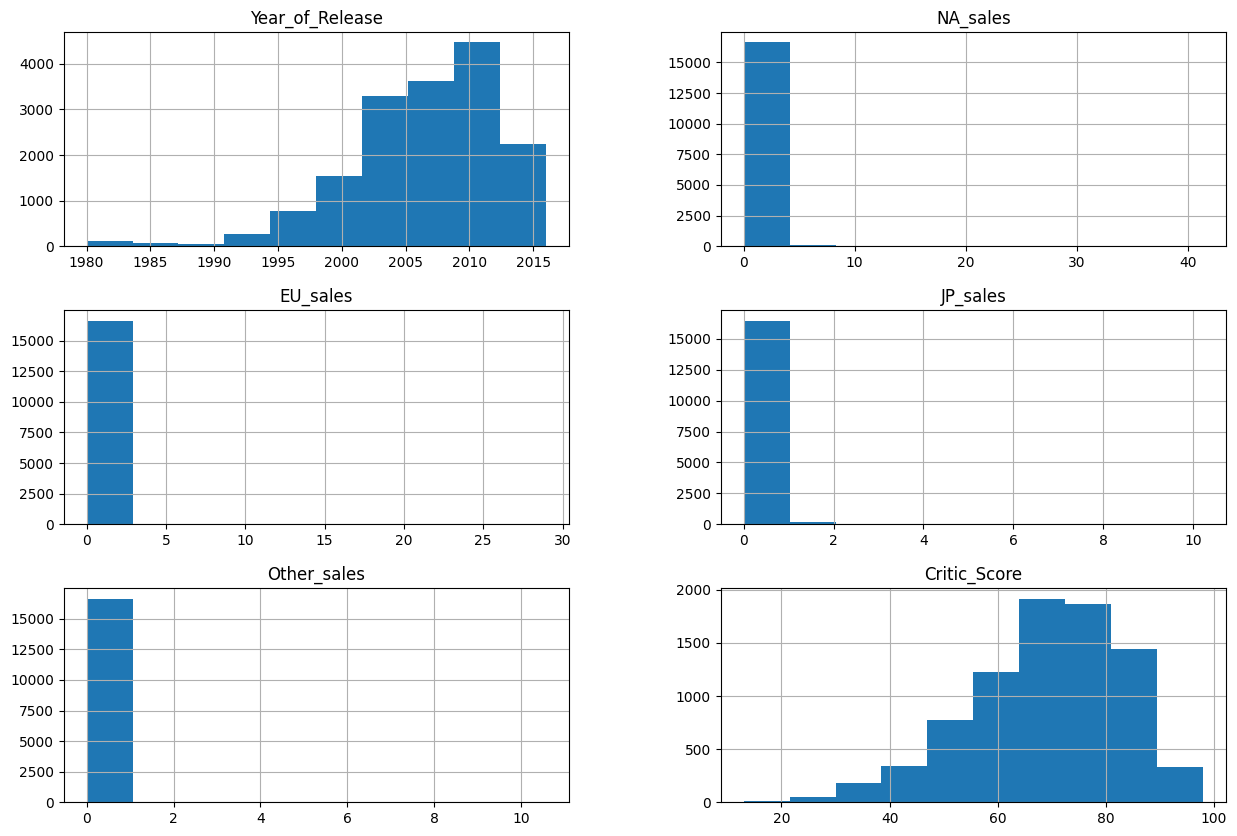

In [ ]:
data.hist(figsize = (15, 10));

* Изучив исходные данные можно отметить, что кол-во параметров представленных в таблице составляет - 10, а кол-во записей для каждого -  16715 строк. Можно сделать вывод , что для анализа предсталена хорошая выборка данных с большим кол-вом данных.

## Шаг 2. Подготовка и предобработка данных

- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы.
- Обработать пропуски при необходимости:
- Описать причины, которые могли привести к пропускам;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Для начала заменим названия столбцов, приведём их к нижнему регистру

In [ ]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Обработаем дубликаты

In [ ]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Удалим явные дубликаты

In [ ]:
data = data.drop(index =[14244,16230])

- Поиск неявных дубликатов:

In [ ]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
years= data['year_of_release'].unique()
sorted(years)

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

In [ ]:
data['name'].unique().tolist()


['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

- При обработке неявных дубликатов были проверены на корректность написания, опечатки уникальные значения в столбцах платформа и год выпуска. Неявных дубликатов не выявлено.
- Обработать столбец с названиями невозможно из-за большого наличия уникальных названий игр.

После изучения данных было выяснено, что часть данных относится к некорректному типу данных, например, следующая колонка: Year_of_Release, User_score.  Данные параметры должны быть отнесены к численному типу (Int, Float)

При попытке привести столбец 'user_score' к формату numeric выходит ошибка :
ValueError: Unable to parse string "tbd" at position 119.

Ошибка tbd означает to be determined , что дословно можно описать как "необходимо определить".

Для решения проблемы необходимо проверить строку 119.

Далее при переводе в тип numeric добавить errors='coerce'.


In [ ]:
data.iloc[119]

name               Zumba Fitness
platform                     Wii
year_of_release           2010.0
genre                     Sports
na_sales                    3.45
eu_sales                    2.59
jp_sales                     0.0
other_sales                 0.66
critic_score                 NaN
user_score                   tbd
rating                         E
Name: 119, dtype: object

In [ ]:
data['user_score']= pd.to_numeric(data['user_score'], errors='coerce')
data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16713, dtype: float64

- Для возможности корректного преобразования тип данных, предварительно нужно обработать пропуски.

In [ ]:
data.isnull().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  1
genre                 1
year_of_release     269
rating             6765
critic_score       8577
user_score         9124
dtype: int64

Построим график с пропущенными значениями

In [ ]:
def pass_value(df):
    try:
        (
            (df.isna().sum())
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = False)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = True, fontsize = 16)
            .set_title('Количество пропусков ' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

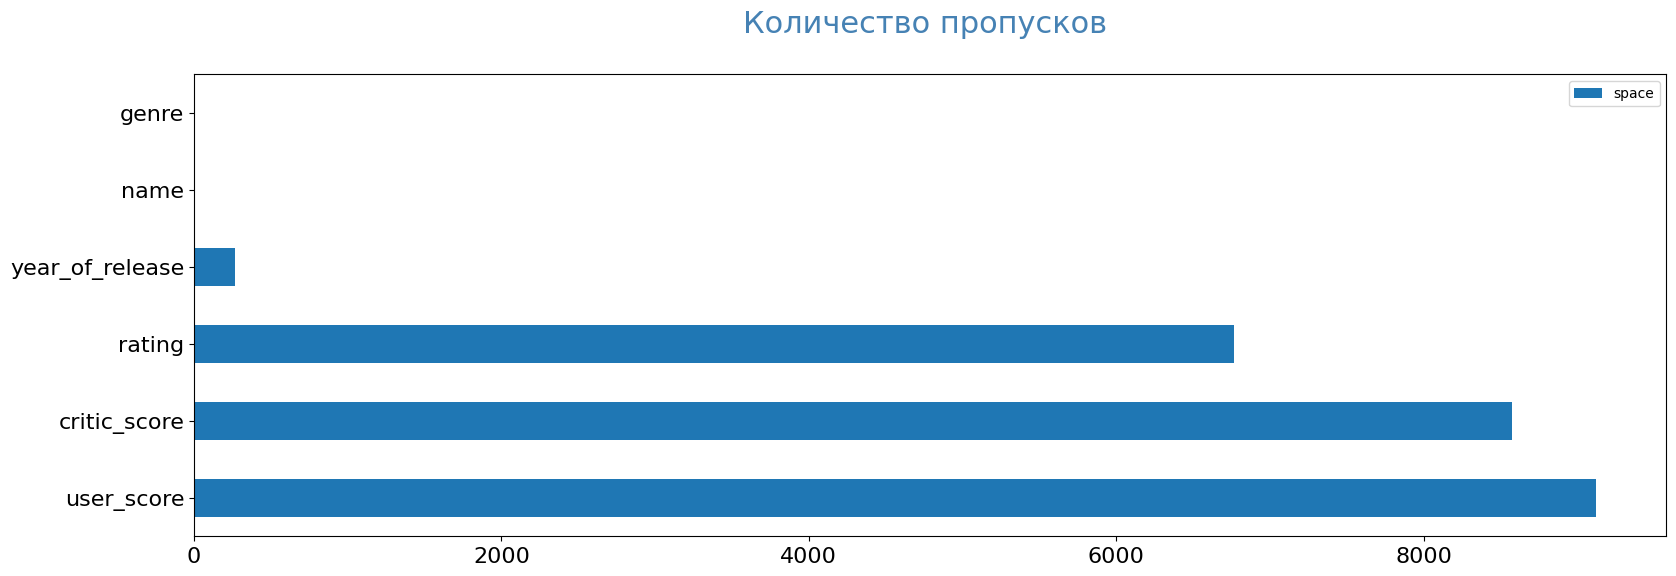

In [ ]:
pass_value(data)

In [ ]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


В таблице и графике выше приведены параметры с пропущенными значениями по возрастанию , больше всего пропусков в столбцах:

+ year_of_release =           269

+ rating =             6766

- critic_score =          8578

+ user_score  =         9125

Далее обработаем пропуски по данным параметрам.

In [ ]:
data = data.dropna(subset = ['year_of_release'])

data['rating'].fillna(value = 'nodata', inplace=True)


<ipython-input-21-8bf78e3ef8cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'].fillna(value = 'nodata', inplace=True)


In [ ]:
data['year_of_release']= data['year_of_release'].astype(int)

<ipython-input-22-5eb6247aa976>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release']= data['year_of_release'].astype(int)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
data.isnull().sum().sort_values()

platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
name                  1
genre                 1
critic_score       8462
user_score         8982
dtype: int64

In [ ]:
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Расчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [ ]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data['total_sales']

<ipython-input-26-9e38bbb53c92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)


0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

# Выводы по предобратоки данных:

- Исходные данные были приведены к удобного для дальнейшему анализу виду;
- Были удалены явные дубликаты данных;
- Данные приведены к правильному типу там где это необходимо;
- Обработаны пропуски в данных.

 # Шаг 3. Исследовательский анализ данных

- Посмотрим, сколько игр выпускалось в разные годы.

- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам.

- Возьмимём данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

- Не учитываем в работе данные за предыдущие годы.

- Узнаем какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы.

- Соотнесём выводы с продажами игр на других платформах.

- Посмотрим на общее распределение игр по жанрам.

Построим график сколько игр выпускалось в разные годы.

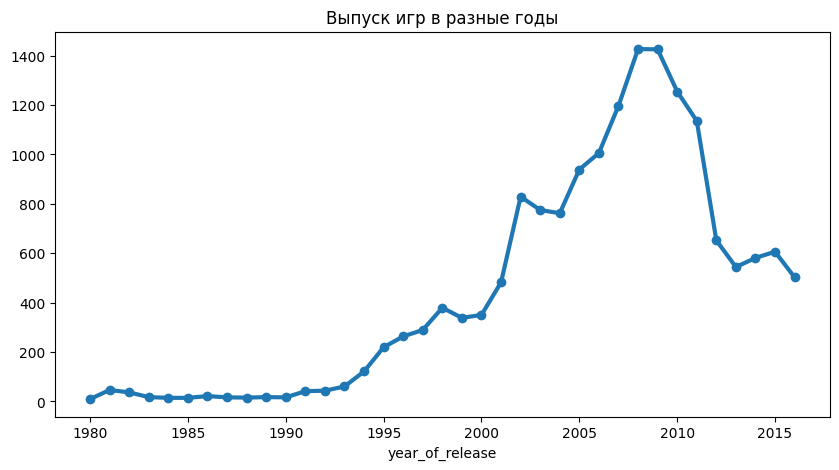

In [ ]:
data.groupby('year_of_release')['name'].count().plot(style = '-o', figsize = (10, 5),
                                                     linewidth=3).set_title("Выпуск игр в разные годы");

- До 2009 года выпуск игр по годам шли вверх, после 2009 - выпуски резко начали падать. Необходимо
изучить что произошло в 2009 и почему это событие так сильно повлияло на выпуск игр.

Анализ изменения продаж по платформам

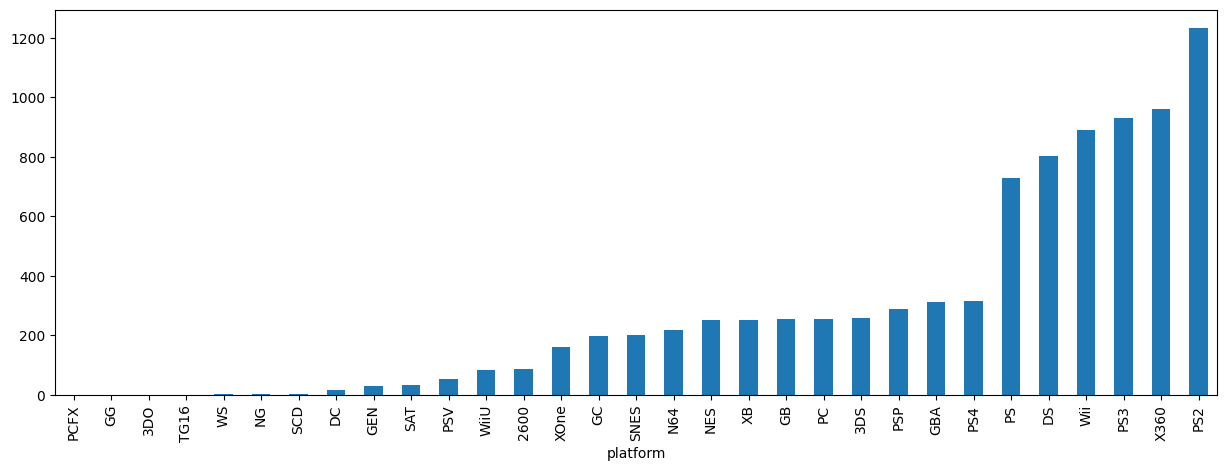

In [ ]:
data.groupby('platform')['total_sales'].sum().sort_values().plot(kind = 'bar',
  linewidth=5, figsize = (15, 5), label='raw');

Выберем платформы с наибольшими суммарными продажами.

In [ ]:
data.groupby('platform')['total_sales'].sum().sort_values()

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       30.74
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.33
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

- Продажи также очень сильно зависили от платформы, иногда разница продаж между платформами
могла достигать десятки раз. Резкий сказок продаж наблюдается на платформах PS,DS,Wii,PS3,X360,
а самая популярная - это PS2.

Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам.

In [ ]:
top = ['PS2','X360','PS3','Wii','DS','PS']
platform_top = data.query('platform == @top')

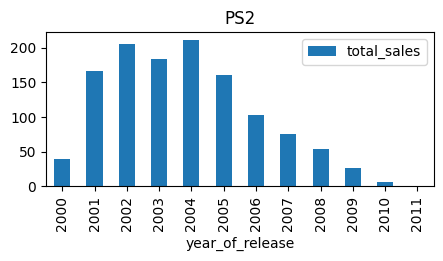

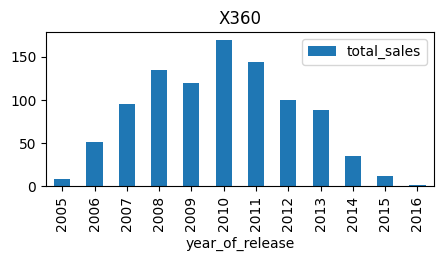

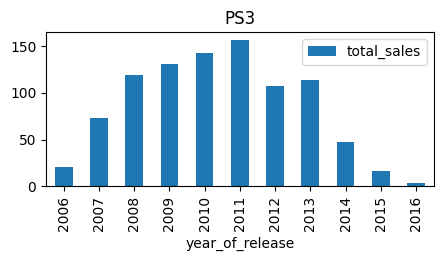

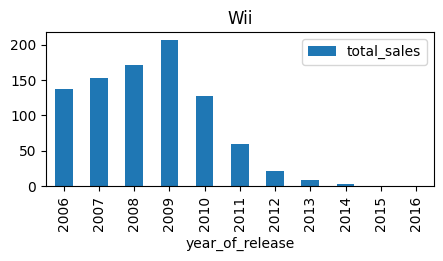

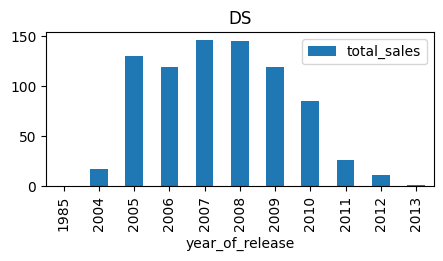

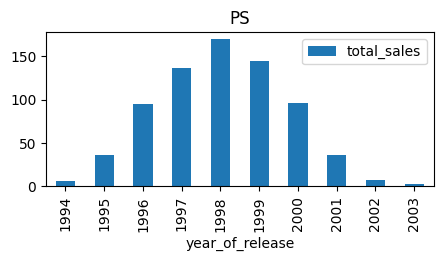

In [ ]:
for platform in top:
    data[data['platform'] == platform].pivot_table(index='year_of_release',
        values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(5,2))
    plt.title(platform)

- В среднем характерный срок за какой появляются новые и исчезают старые платформы равняется 5-7 лет.

In [ ]:
data_act_period = data.query('year_of_release >= 2014')

Рассмотрим какие платформы лидируют по продажам, растут и падают

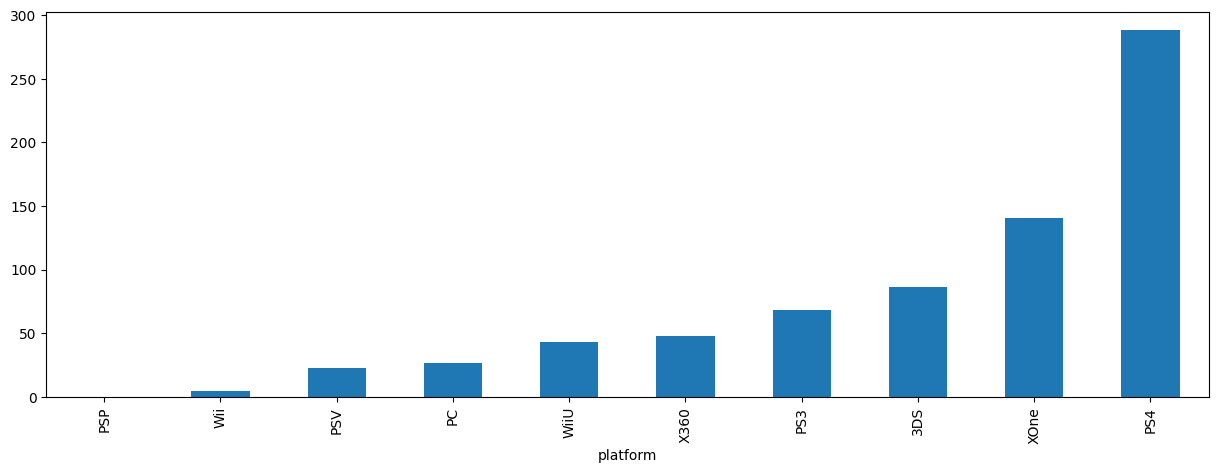

In [ ]:
data_act_period.groupby('platform')['total_sales'].sum().sort_values().plot(kind = 'bar',
  linewidth=5, figsize = (15, 5), label='raw');

- После анализа можем сделать вывод о самых популярных платформах в последние годы :

    'PS4', 'XOne', '3DS', PS3 , X360

Созданные ниже графики помогут нам понять какие платформы растут, а какие падают в продажах

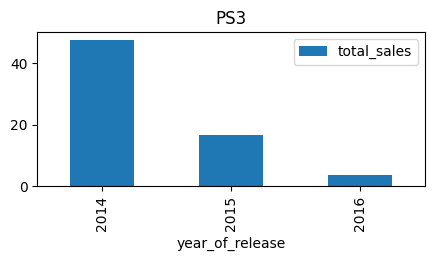

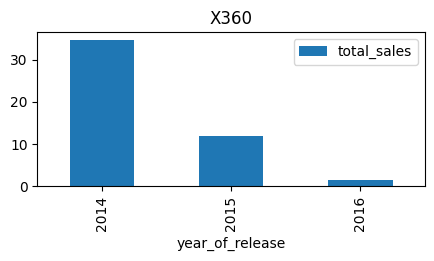

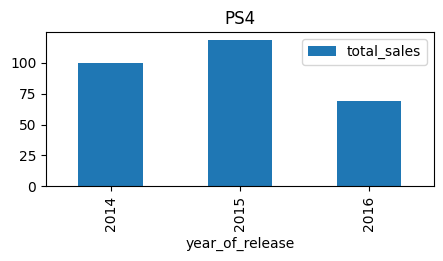

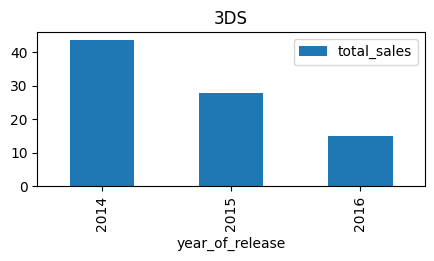

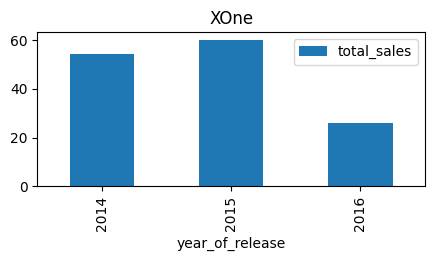

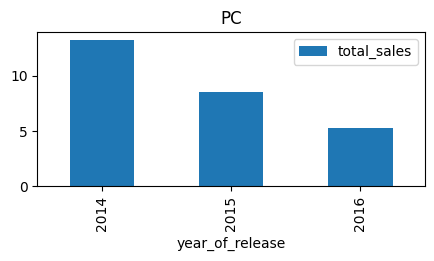

In [ ]:
top = ['PS3','X360','PS4','3DS','XOne','PC']
for platform in top:
    data_act_period[data_act_period['platform'] == platform].pivot_table(index='year_of_release'
    ,values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(5,2))
    plt.title(platform)

- Поанализировав обработанные данные можно сделать следующие выводы:
    1. Лидеры по продажам в посление годы: платформы 'PS4', 'XOne';
    2. Платформы теряющие популярность : 'PS3', 'X360','3DS','PC';
    3. Платформы набирающие популярность : 'PS4','XOne';
    4. 2016 год можно не учитывать так как на момент анализа 2016 год был не завершен.

- Две потенциально прибыльных платформ на последнюю дату это : PS4, XOne

# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

График по продажам игры платформы "PS4"

(0.0, 1.75)

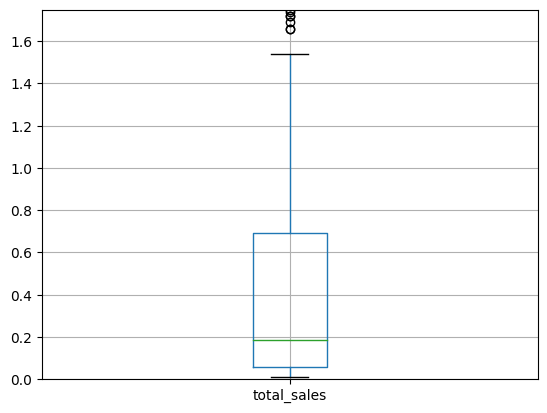

In [ ]:
data_act_period.query('platform == "PS4"').boxplot(column = 'total_sales');
plt.ylim(0,1.75)

График по продажам игры платформы "XOne"

(0.0, 2.0)

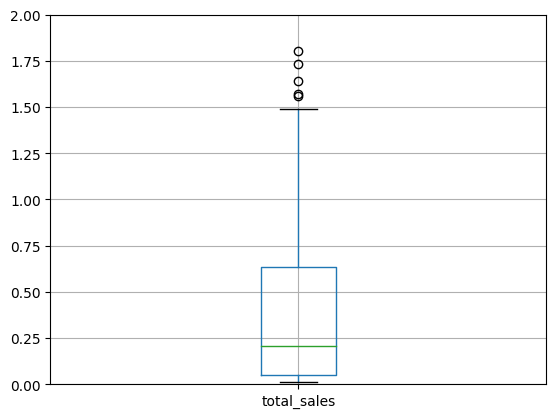

In [ ]:
data_act_period.query('platform == "XOne"').boxplot(column = 'total_sales');
plt.ylim(0,2)

График по продажам игры платформы "3DS"

(0.0, 0.8)

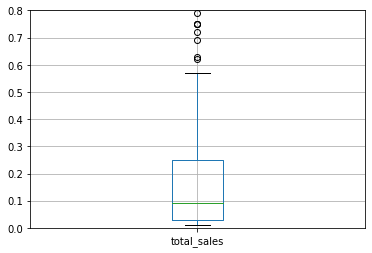

In [ ]:
# «ящик с усами» по глобальным продажам игр'3DS'.
data_act_period.query('platform == "3DS"').boxplot(column = 'total_sales');
plt.ylim(0,0.8)

График по глобальным продажам игр в разбивке по всем платформам.

(0.0, 2.0)

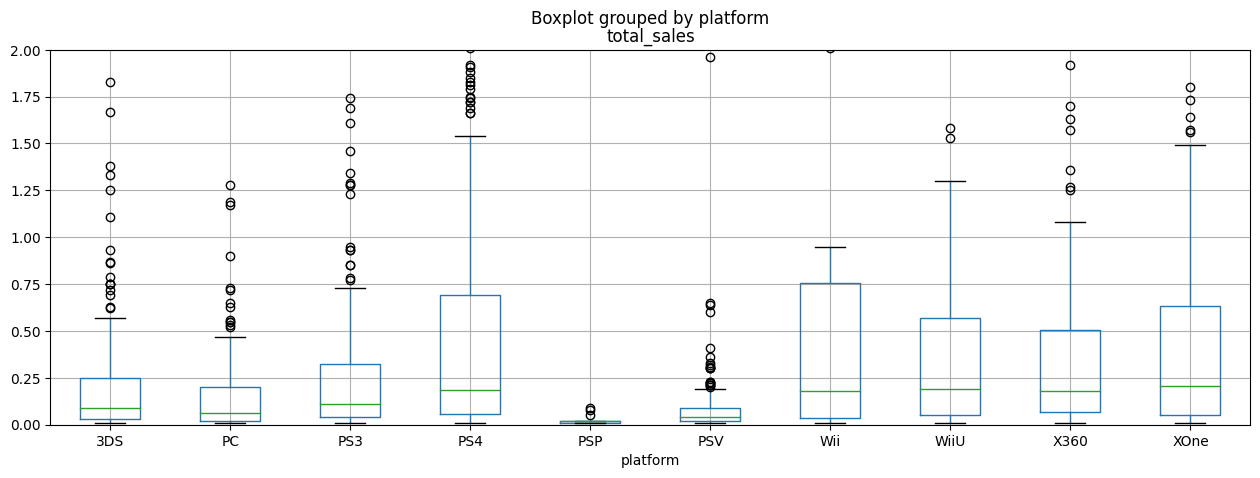

In [ ]:
data_act_period.boxplot(column = 'total_sales', by = 'platform',figsize=(15,5));
plt.ylim(0,2)


- По "ящику с усами" видим что медианному значению по продаже лидирует - PS4 , XOne

In [ ]:
data_act_period.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


Коэффициент корреляции Пирсона зависимости продаж от оценки критиков : 0.5257228356581523
Коэффициент корреляции Пирсона зависимости продаж от оценки пользователей: -0.138444570945665


,critic_score,user_score,total_sales
critic_score,1.000000,0.625309,0.525723
user_score,0.625309,1.000000,-0.138445
total_sales,0.525723,-0.138445,1.000000


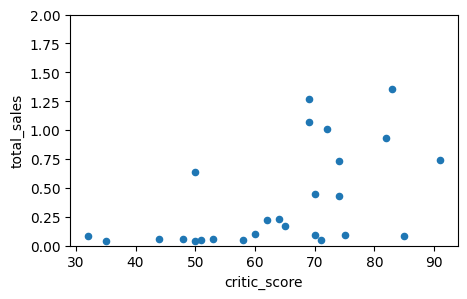

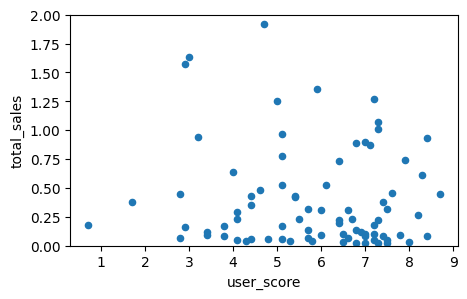

In [ ]:
data_act_period.query('platform == "X360"').plot(x= 'critic_score',
            y = 'total_sales', kind='scatter', figsize = (5,3));
plt.ylim (0,2)

print('Коэффициент корреляции Пирсона зависимости продаж от оценки критиков :',
      data_act_period.query('platform == "X360"')['critic_score'].corr(data_act_period.query
                                                    ('platform == "X360"')['total_sales']))

data_act_period.query('platform == "X360"').plot(x= 'user_score',
            y = 'total_sales', kind='scatter', figsize = (5,3));

plt.ylim (0,2)

print('Коэффициент корреляции Пирсона зависимости продаж от оценки пользователей:',
      data_act_period.query('platform == "X360"')['user_score'].corr(data_act_period.query
                                                    ('platform == "X360"')['total_sales']))

data_act_period.query('platform == "X360"')[['critic_score', 'user_score', 'total_sales']].corr()

- продажи растут прямо пропорцианально оценкам критиков. Оценки пользователей не влияют на продажи.

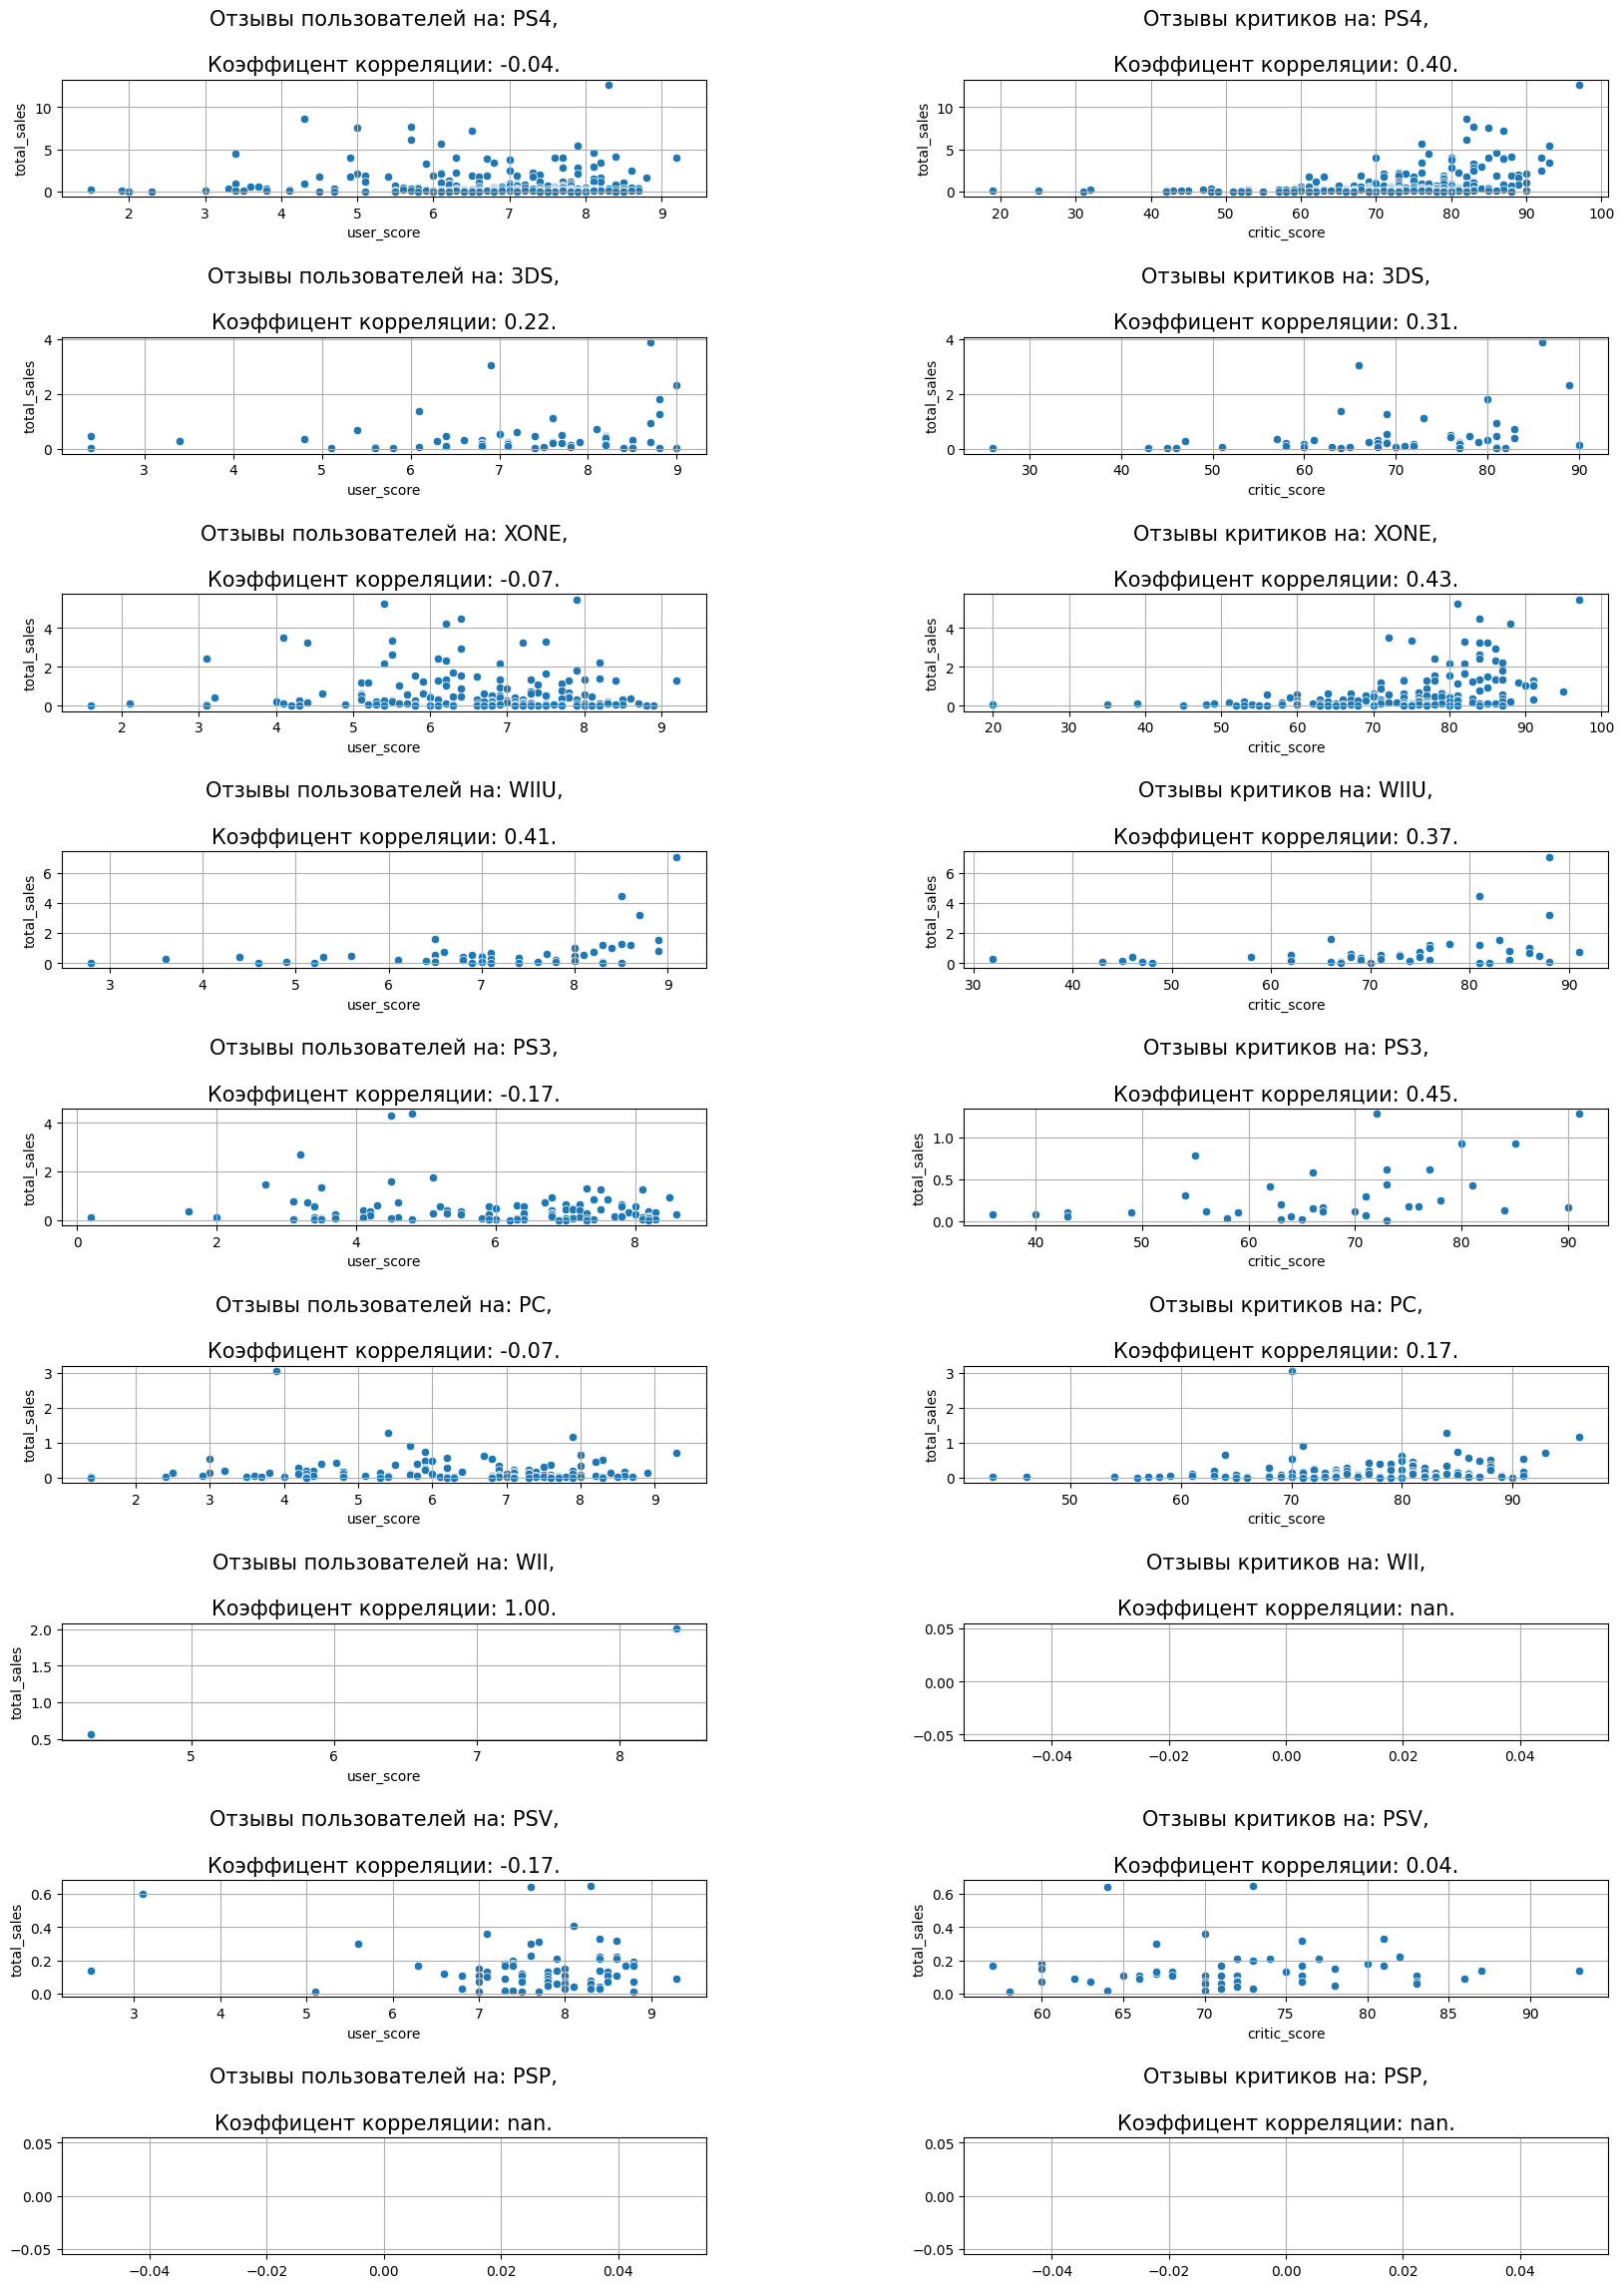

In [ ]:
# сохраним название всех платформ data_act_period в list
list = data_act_period['platform'].unique()
list = list[list != "X360"]

# напишем цикл для вывода диаграммы рассеивания и коэффицента корреляции для всех остальных платформ
position = 0
plt.figure(figsize=[20,35])
plt.subplots_adjust(wspace=0.4, hspace=1.2)
for platform_name in list:
    position += 1
    data_score = data_act_period[data_act_period['platform'] == platform_name]


    plt.subplot(11, 2, position)
    corr_user = data_score['total_sales'].corr(data_score['user_score'])
    plt.title(f'Отзывы пользователей на: {platform_name.upper()},\n\nКоэффицент корреляции: {corr_user:.2f}.', fontsize=15)
    sns.scatterplot(x='user_score', y='total_sales', data = data_score)
    plt.grid(True)


    position += 1
    plt.subplot(11, 2, position)
    corr_critic = data_score['total_sales'].corr(data_score['critic_score'].astype('float32'))
    plt.title(f'Отзывы критиков на: {platform_name.upper()},\n\nКоэффицент корреляции: {corr_critic:.2f}.', fontsize=15)
    sns.scatterplot(x='critic_score', y='total_sales', data=data_score)
    plt.grid(True);

- по остальным платформам тренд аналогичный: оценки критиков оказывают определенное влияние на продажи игр, оценки пользователей практически не влияют на продажи.

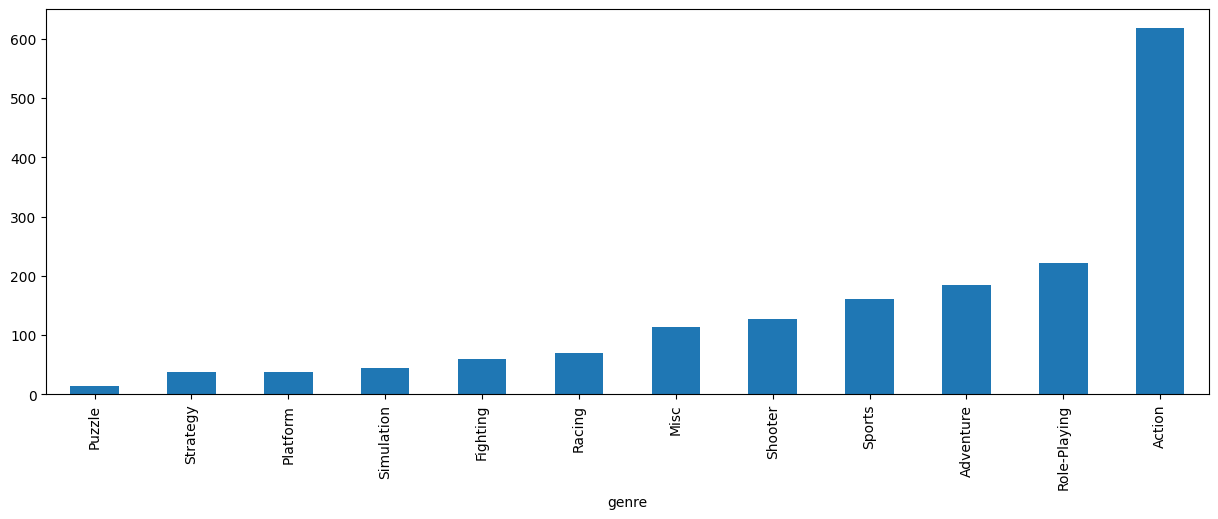

In [ ]:

data_act_period.groupby('genre')['total_sales'].count().sort_values().plot(kind = 'bar',
  linewidth=5, figsize = (15, 5), label='raw');

- В лидерах по количеству продаж такие жанры как : Action, Role-Playing, Adventure, Sports, Misc, Shooter;
- Самые низкие продажи : Puzzle , Strategy.

Распределение средней суммы покупок по жанрам

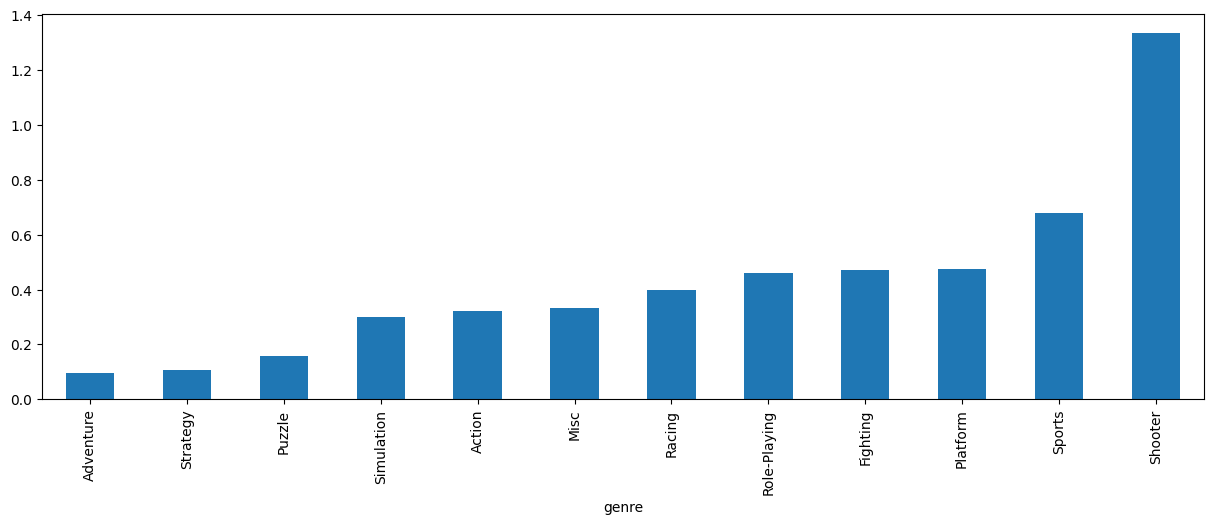

In [ ]:
data_act_period.groupby('genre')['total_sales'].mean().sort_values().plot(kind = 'bar',
  linewidth=5, figsize = (15, 5), label='raw');

Распределение медианной  суммы покупок по жанрам.

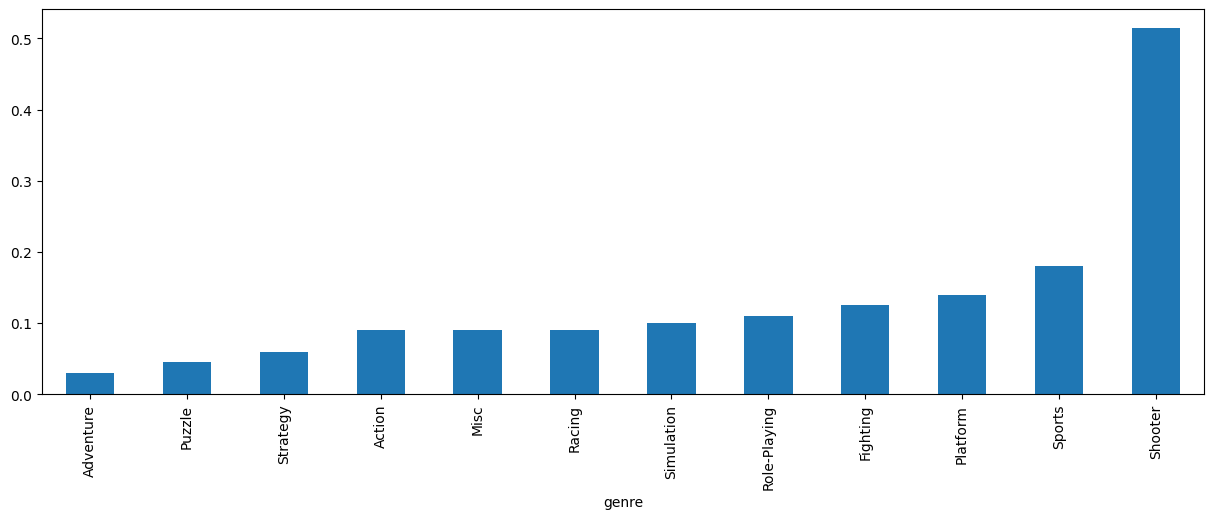

In [ ]:
data_act_period.groupby('genre')['total_sales'].median().sort_values().plot(kind = 'bar',
  linewidth=5, figsize = (15, 5), label='raw');

График «ящик с усами» по глобальным продажам игр в разбивке по всем платформам.

(0.0, 2.0)

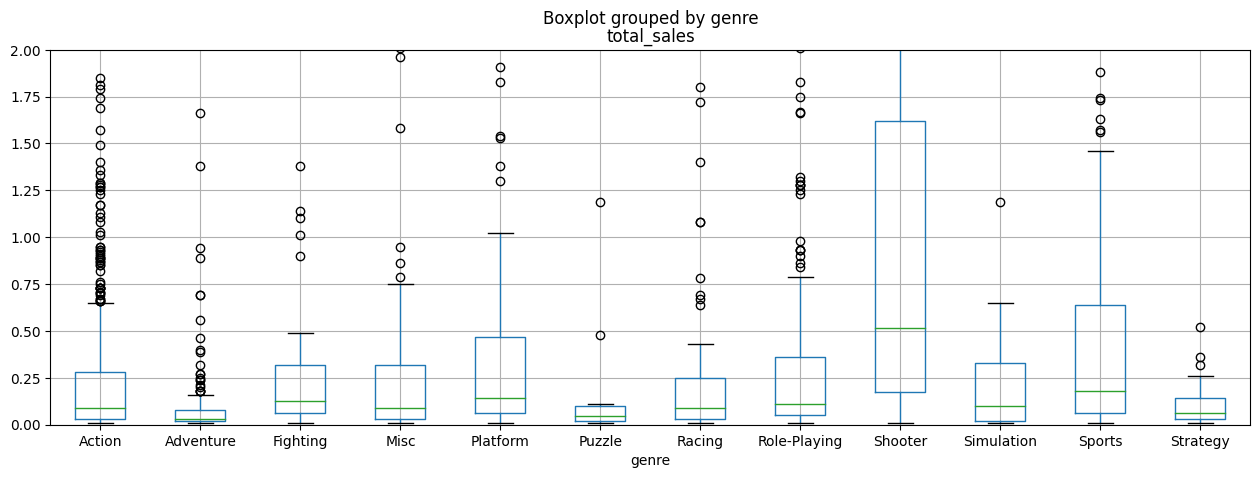

In [ ]:
data_act_period.boxplot(column = 'total_sales', by = 'genre',figsize=(15,5));
plt.ylim(0,2)


- В лидерах по прибальности такие жанры как : Shooter, Sports;
- Самые низкие продажи : Adventure, Puzzle, Strategy;
- Можно сделать вывод что самые популярные и прибыльные игры относятся к жанру Shooter, а самые не популярные это : Puzzle.
- Людям больше нравятся динамичные игры.

# Шаг 4. Составить портрет пользователя каждого региона


Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
print('Совокупные продажи в Японии :', "%.1f" % data_act_period['jp_sales'].sum())
print('Совокупные продажи в Европе :', "%.1f" % data_act_period['eu_sales'].sum())
print('Совокупные продажи в Сев.Америке :', "%.1f" % data_act_period['na_sales'].sum())

Совокупные продажи в Японии : 93.1
Совокупные продажи в Европе : 270.7
Совокупные продажи в Сев.Америке : 284.1


- Самый большой рынок - США

# Северная Америка

Платформы с наибольшими 5 суммарными продажами NA.

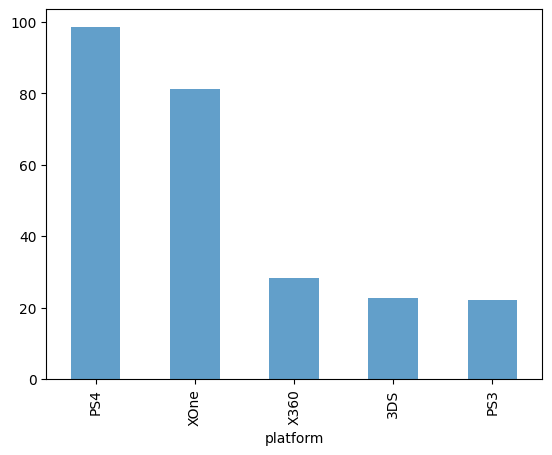

In [ ]:
data_act_period.groupby('platform')['na_sales'].sum().sort_values(ascending = False)\
.head(5).plot(kind='bar', x ='platform', linewidth=5, alpha=0.7, label='raw');

Жанры с наибольшими 5 суммарными продажами NA.

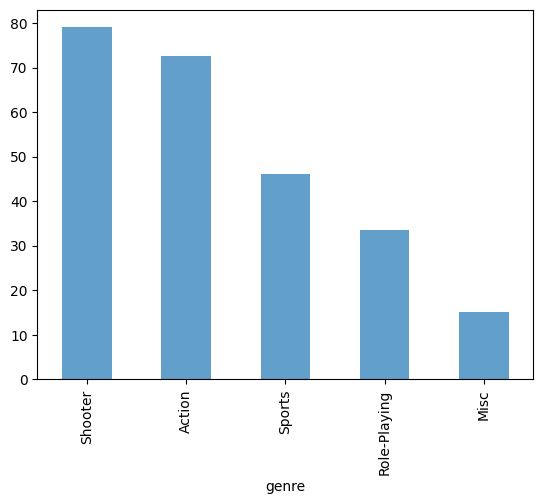

In [ ]:
data_act_period.groupby('genre')['na_sales'].sum().sort_values(ascending = False)\
.head(5).plot(kind='bar', x ='genre', linewidth=5, alpha=0.7, label='raw');

- Лидер по продажам в регионе NA (США)  - платформа PS4 и жанр Shooter

Рейтинги с наибольшими 5 суммарными продажами NA.

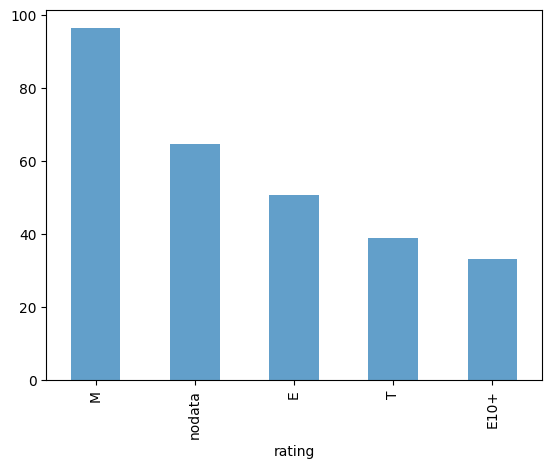

In [ ]:
data_act_period.groupby('rating')['na_sales'].sum().sort_values(ascending = False)\
.head().plot(kind='bar', x ='rating', linewidth=5, alpha=0.7, label='raw');

- В северной Америке основным рейтингом ESRB по продажам является M - "материалы игры не подходят для лиц младше 17 лет". При этом для рынка США очень сильно влияет рейтинг М , продажи с данным рейтингом почти в 2 раза выше чем продажи других категорий.

# Европа

Платформы с наибольшими 5 суммарными продажами EU.

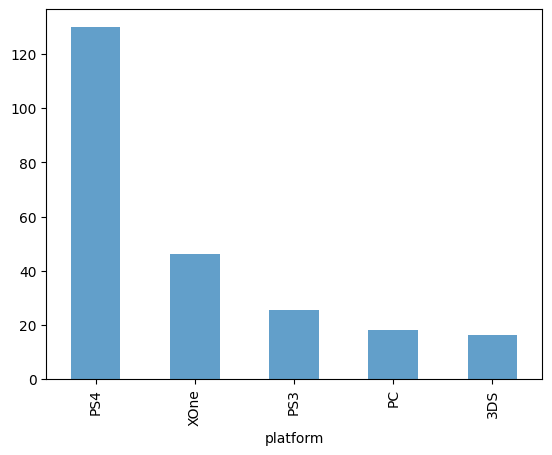

In [ ]:
data_act_period.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)\
.head(5).plot(kind='bar', x ='platform', linewidth=5, alpha=0.7, label='raw');

Жанры с наибольшими 5 суммарными продажами EU.

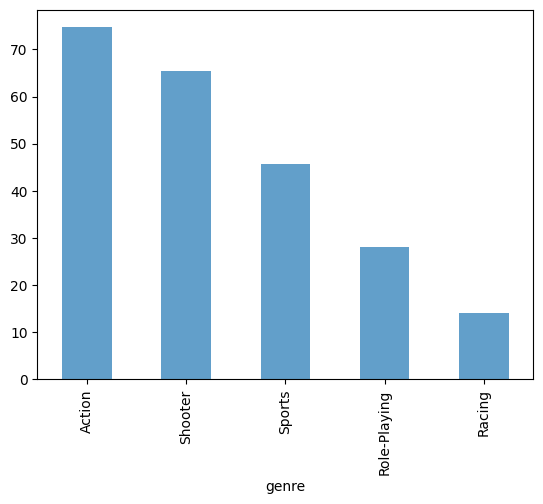

In [ ]:
data_act_period.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)\
.head(5).plot(kind='bar', x ='genre', linewidth=5, alpha=0.7, label='raw');

- Лидер по продажам в регионе EU - платформа PS4 и жанр Action

Рейтинги с наибольшими 5 суммарными продажами EU.

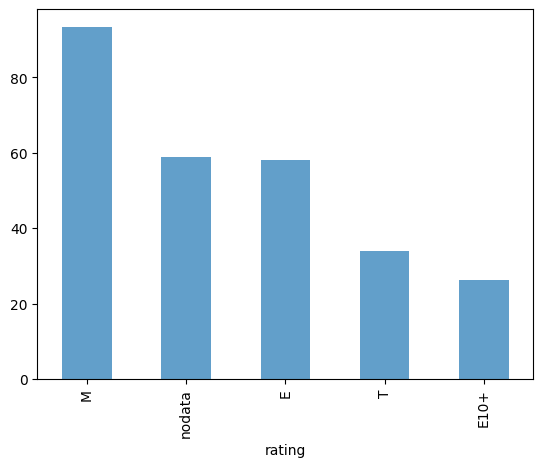

In [ ]:
data_act_period.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)\
.head().plot(kind='bar', x ='rating', linewidth=5, alpha=0.7, label='raw');

- В Европе основным рейтингом ESRB по продажам является  M - "молодежь до 17 лет"

# Япония

Платформы с наибольшими 5 суммарными продажами JP

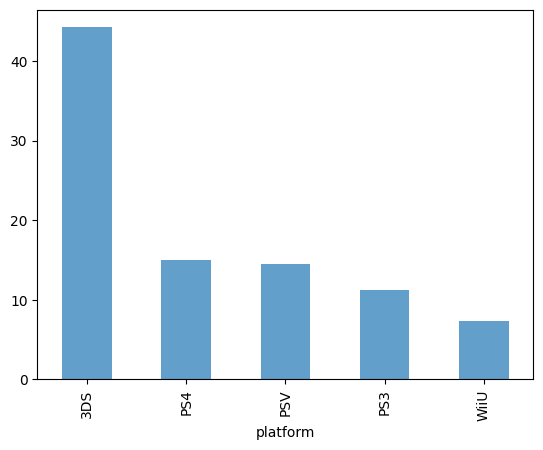

In [ ]:
data_act_period.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)\
.head(5).plot(kind='bar', x ='platform', linewidth=5, alpha=0.7, label='raw');

Жанры с наибольшими 5 суммарными продажами JP

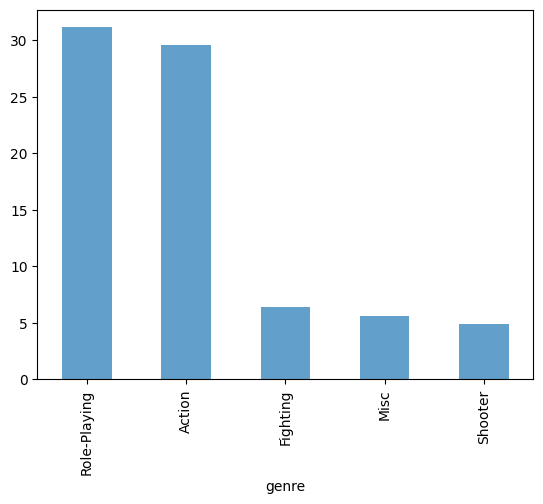

In [ ]:
data_act_period.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5)\
.plot(kind='bar', x ='genre', linewidth=5, alpha=0.7, label='raw');

- Лидер по продажам в регионе JP (Японии) - платформа 3DS и жанр Role-Playing

Рейтинги с наибольшими 5 суммарными продажами JP

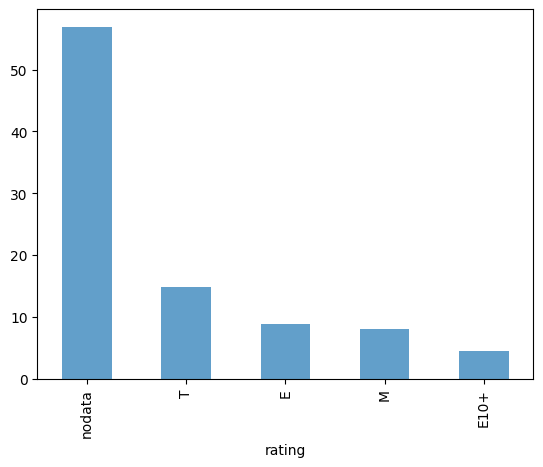

In [ ]:
data_act_period.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)\
.head().plot(kind='bar', x ='rating', linewidth=5, alpha=0.7, label='raw');

- В Японии основным рейтингом ESRB по продажам является nodata (игры без рейтинга). Это значит потому что в Японии большинство игр не нормируется рейтингом ESRB.

# Шаг 5. Проверим гипотезы



- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задать самостоятельно пороговое значение alpha.
Пояснить:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.


Проверка гипотезы 1: Средние пользовательские рейтинги (оценки) платформ Xbox One и PC одинаковые;

- H_0: Средний пользовательский рейтинг платформы Xbox One = Средний пользовательский рейтинг платформы PC;

- H_a: Средний пользовательский рейтинг платформы Xbox One ≠ Средний пользовательский рейтинг платформы PC;

alpha = 0.05


In [ ]:
xone = data_act_period.query('platform == "XOne"')['user_score'].dropna()
pc = data_act_period.query('platform == "PC"')['user_score'].dropna()

In [ ]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(xone,pc,equal_var=False)

# alpha = задайте значение уровня значимости

alpha = 0.05

# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print(results.pvalue)
    print('отвергаем нулевую гипотезу')
else:
    print(results.pvalue)
    print('не получилось отвергнуть нулевую гипотезу')


0.11601398086668832
не получилось отвергнуть нулевую гипотезу


- Средний пользовательский рейтинг платформы Xbox One = Средний пользовательский рейтинг платформы PC;

In [ ]:
action = data_act_period.query('genre == "Action"')['user_score'].dropna()
sports = data_act_period.query('genre == "Sports"')['user_score'].dropna()

In [ ]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(action,sports,equal_var=False)

# alpha = задайте значение уровня значимости

alpha = 0.05

# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print(results.pvalue)
    print('отвергаем нулевую гипотезу')
else:
    print(results.pvalue)
    print('не получилось отвергнуть нулевую гипотезу')


1.1825550382644557e-14
отвергаем нулевую гипотезу


Нулевая и альтернативные гипотезы были сформулированны исходя из задания, где в каждом случае необходимо
было проверить равенство двух генеральных совокупностей. В первом случае проверяли на их схожесть, а во втором -на их отличие между собой.
За критерий было взято отличие от параметра Альфа, выбранный равным 5%.
Если значение P value  меньше Alpha то выборки не достаточны схожи между собой в пределах заданых граничных значений , а если
больше - схожи. Соответсвенно далее делаем вывод по отвержению либо не отвержению гипотез.

<div style="border:2px solid Black; padding:20px;">
<h1>Общий вывод</h1>
- В рамках выполнения проекта были проанализированны из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Были выявлены закономерности определяющие успешность игры. Это позволило сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в будущем.


- Далее будут представлены выводы по каждому этапу выполнения работы:

- После изучения данных было выяснено, что часть данных относится к некорректному типу данных, например, следующие колонки:(Year_of_Release, User_Score)

- Тип данных данных параметров был исправлен на численный тип Int или Float.

- При попытке привести столбец 'user_score' к формату numeric выходила ошибка : ValueError: Unable to parse string "tbd" at position 119. Ошибка tbd означает to be determined , что дословно можно описать как "необходимо определить". Для решения проблемы при переводе в тип numeric добавить errors='coerce'.

- Для возможности корректного преобразования тип данных, предварительно нужно также было  обработать пропуски.

- В таблице и графике выше приведены параметры с пропущенными значениями по возрастанию , больше всего пропусков в столбцах:(year_of_release = 269, rating =  6766, critic_score =  8578, user_score  = 9125)

- Далее были обработаны пропуски по данным параметрам.

- При обработке неявных дубликатов были проверены на корректность написания, опечатки уникальные значения в столбцах платформа и год выпуска. Неявных дубликатов не выявлено.

- Обработать столбец с названиями невозможно из-за большого наличия уникальных названий игр.

- Пропуски в столбцах 'critic_score' и 'user_score' не стали заменять другими значениями, чтобы не искажать распределение и дальнейший анализ. Кол-во пропусков в 'year_of_release' минимальное , на статистику не влияет - можно удалить для возможности в дальнейшем перевести в тип int.

- Исходные данные были приведены к удобного для дальнейшему анализу виду.

- Были удалены явные дубликаты данных.

- Данные приведены к правильному типу там где это необходимо.

- Обработаны пропуски в данных.

- Пропуски в столбцах 'rating' обрабатывать не будем , т.к. их удаление или замена на 0 сильно скажется на общие данные. Заполним пропуски в данных по рейтингу заглушкой "nodata".



- После того как все данные были подготовены был выполнен анализ данных и были сделаны следующие выводы:

- Продажи также очень сильно зависили от платформы, иногда разница продаж между платформами могла достигать десятки раз. Наибольшие продажи за всю историю прихдяться на платформах PS,DS,Wii,PS3,X360,  самая популярная - это PS2.

- В среднем характерный срок за какой появляются новые и исчезают старые платформы равняется 5-7 лет.


- Поанализировал обработанные данные можно сделать следующие выводы:

- Лидеры по продажам в посление годы: платформы 'PS4', 'XOne', '3DS', 'PS3', 'X360';
- Платформы теряющие популярность : 'PS3', 'X360','3DS','PC';
- Платформы набирающие популярность : 'PS4','XOne';
- 2016 год можно не учитывать так как на момент анализа 2016 год был не завершен.
- Две потенциально прибыльных платформ на последнюю дату это : PS4, XOne.


- По "ящику с усами" видим что медианному значению по продаже лидирует - PS4,XOne.

- Продажи растут прямо пропорцианально оценкам критиков и пользователей. Оценки пользователей не влияют на продажи.

- По остальным платформам тренд аналогичный: оценки критиков оказывают определенное влияние на продажи игр, оценки пользователей практически не влияют на продажи.

- В лидерах по прибальности такие жанры как : Shooter, Sports;

- Самые низкие продажи : Adventure, Puzzle, Strategy;

- Можно сделать вывод что самые популярные и прибыльные игры относятся к жанру Shooter, а самые не популярные это : Puzzle.

- Людям больше нравятся "стрелялки".

- Лидер по продажам в регионе NA (США)  - платформа PS4 и жанр Shooter.

- Лидер по продажам в регионе EU - платформа PS4 и жанр Action

- В Европе основным рейтингом ESRB по продажам является  M - "молодежь до 17 лет".

- Лидер по продажам в регионе JP (Японии) - платформа 3DS и жанр Role-Playing.

- В Японии основным рейтингом ESRB по продажам является nodata (игры без рейтинга). Это значит потому что в Японии большинство игр не нормируется рейтингом ESRB.


- Средний пользовательский рейтинг платформы Xbox One = Средний пользовательский рейтинг платформы PC;.

- Средний пользовательский рейтинг Action ≠ Средний пользовательский рейтинг Sports;

- Нулевая и альтернативные гипотезы были сформулированны исходя из задания, где в каждом случае необходимо было проверить равенство двух генеральных совокупностей. В первом случае проверяли на их схожесть, а во втором -на их отличие между собой. За критерий было взято отличие от параметра Альфа, выбранный равным 5%. Если значение P value  меньше Alpha то выборки не достаточны схожи между собой в пределах заданых граничных значений , а если больше - схожи. Соответсвенно далее делаем вывод по отвержению либо не отвержению гипотез.

# Общие рекомедации для рекламной кампании на 2017 год:

1. Делать ставку на потенциально прибыльных платформ на последнюю дату это : PSP4, XOne.
2. Делать ставку на такие жанры как : Shooter, Sports.
3. Больше продавать игры с рейтингом рейтингом ESRB  M - "до 17 лет".
</div>
